<a href="https://colab.research.google.com/github/jequinterope/AlgorithmsUn2020II/blob/master/GaleShapleyIrving/Gale_Shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wPrefersM1OverM(prefer, w, m, m1):   
    # Comprueba si w prefiere m1 sobre m, si prefiere a m retorna True 
    for i in range(N):
        if (prefer[w][i] == m1):
            return True
        if (prefer[w][i] == m):
            return False 

In [3]:
def stableMarriage(prefer, N):
  # Genera las parejas estables para N niños y N niñas en la que los niños hacen las propuestas
  # Los niños van enumerados del 0 a N - 1
  # Las niñas van desde N a 2N - 1

  iteration = 0
  proporsal = 0

  # Lista donde si indicara cual es el compañero de la niña, el valor de -1 indica que la niña aun esta disponible
  wPartner = [-1 for i in range(N)] 
  
  # Lista donde se almacera si el niño aun no tiene pareja en caso de que halla sido rechazado
  mPaired = [False for i in range(N)]
  freeCount = N 
  while (freeCount > 0):
    # Busca al primer hombre que aun este emparejado
    for m in range(N):
      # Recorre todos los niños que aun no esten emparejados, y posteriormente hace la propuesta a las niñas de su lista de preferencia
      if (mPaired[m]):
        continue
      i = 0
      while i < N and not mPaired[m]:
        # Primera niña en la lista de preferencia del niño m
        w = prefer[m][i]
        # Si la niña aun no esta emparejada se asigna en esta iteracion el niño que haga la propuesta
        if (wPartner[w - N] == -1):
          wPartner[w - N] = m
          mPaired[m] = True
          freeCount -= 1
        else:
          # Buscamos la pareja actual de w, m1
          m1 = wPartner[w - N]
          
          # Comprobamos si w prefiera a m1 sobre m para corregir el emparejamiento
          if (not wPrefersM1OverM(prefer, w, m, m1)):
            wPartner[w - N] = m
            mPaired[m] = True
            mPaired[m1] = False
        i += 1
      proporsal += 1
    iteration += 1
  return (wPartner, iteration, proporsal)

## Parejas estables para $n=4$ y $n = 40$
Los niños se encuentran enumerados des de 0 hasta $n-1$ y las nuñas estan enumeraddas desde $n$ hasta $2n - 1$ las listas de preferencia de las niñas y los niñoes estan almacenadas en una matriz de tamaño $2n$ x $n$ donde las filas representan las lista de preferencias de cada individuo comenzando por la lista de preferencia de los niños y posteriormen las listas de preferencia de las niñas

In [4]:
# Mejor Caso para n = 4
N = 4
prefer = [[4, 5, 6, 7],
          [5, 6, 4, 7],
          [6, 5, 4, 7],
          [7, 4, 6, 5],
          [0, 2, 3, 1],
          [1, 3, 0, 2],
          [2, 0, 1, 3],
          [3, 1, 2, 3]] 

(wPartner, iteration, proporsal) = stableMarriage(prefer, N)

print("Number of iterations:", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations: 1
Number of proporsal:  4
Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3


In [5]:
# Peor caso para n = 4
prefer = [[4, 5, 6, 7],
          [5, 6, 4, 7],
          [6, 5, 4, 7],
          [5, 4, 6, 7],
          [1, 2, 3, 0],
          [2, 3, 0, 1],
          [3, 0, 1, 2],
          [0, 1, 2, 3]] 

(wPartner, iteration, proporsal) = stableMarriage(prefer, N)

print("Number of iterations:", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations: 4
Number of proporsal:  11
Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0


In [6]:
N = 40
prefer = [[] for i in range(2*N)]
# Generacion de las listas de preferencia de los Niños
for i in range(N):
  prefer[i] = list(np.random.permutation([j for j in range(N, 2*N)]))

# Generacion de las listas de preferencia de las Niñas
for i in range(N, 2*N):
  prefer[i] = list(np.random.permutation([j for j in range(N)]))

(wPartner, iteration,proporsal) = stableMarriage(prefer, N)

print("Number of iterations: ", iteration)
print("Number of proporsal: ", proporsal)
print("Woman ", " Man")
for i in range(N):
  print(i + N, "\t", wPartner[i])

Number of iterations:  5
Number of proporsal:  61
Woman   Man
40 	 20
41 	 24
42 	 5
43 	 15
44 	 19
45 	 35
46 	 18
47 	 16
48 	 34
49 	 30
50 	 32
51 	 17
52 	 9
53 	 31
54 	 0
55 	 38
56 	 2
57 	 27
58 	 36
59 	 6
60 	 8
61 	 21
62 	 23
63 	 13
64 	 25
65 	 10
66 	 26
67 	 22
68 	 11
69 	 12
70 	 3
71 	 39
72 	 29
73 	 7
74 	 1
75 	 37
76 	 14
77 	 28
78 	 4
79 	 33


## 100 veces algoritmo parejas estables
se tomo como valor de $n = 30$ pra la realizar las 100 simulaciones

Numero Promedio de Iteraciones: 24
Numero minimo de Iteraciones: 2
Numero Maximo e Iteraciones: 20
Promedio de propuestas: 185


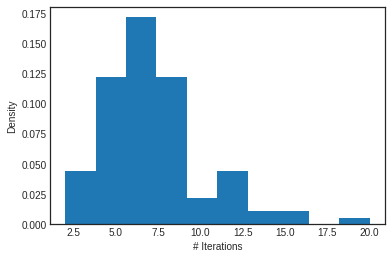

In [7]:
iterations = []
total = 0
total_proporsal = 0

for i in range(100):
  N = 30
  prefer = [[] for i in range(2*N)]
  # Generacion de las listas de preferencia de los Niños
  for i in range(N):
    prefer[i] = list (np.random.permutation([j for j in range(N, 2*N)]))

  # Generacion de las listas de preferencia de las Niñas
  for i in range(N, 2*N):
    prefer[i] = list (np.random.permutation([j for j in range(N)]))

  (wPartner, iteration, proporsal) = stableMarriage(prefer, N)
  total += iteration
  total_proporsal += proporsal
  iterations.append(iteration)

print('Numero Promedio de Iteraciones: {}\nNumero minimo de Iteraciones: {}\nNumero Maximo e Iteraciones: {}'.format(total//N, min(iterations), max(iterations)))
print('Promedio de propuestas: {}'.format(total_proporsal // N))
bins = list (set (iterations))
plt.style.use('seaborn-white')
plt.hist(iterations,density=True,label=['# Iterations'])
plt.xlabel('# Iterations')
plt.ylabel('Density');

## Referencia
* https://www.geeksforgeeks.org/stable-marriage-problem/
